In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
#from pandas.plotting import lag_plot
#from pandas.plotting import autocorrelation_plot
#from statsmodels.tsa.ar_model import AutoReg

## Load Washington DC data

In [2]:
train = pd.read_csv('DC.csv')
train['doy'] = pd.to_datetime(train['DATE']).dt.dayofyear
print(train.shape)
train.head()

(31208, 16)


,location,lat,long,alt,year,bloom_date,bloom_doy,DATE,PRCP,SNWD,TAVG,TMAX,TMIN,Status,CDD,doy
0,washingtondc,38.88535,-77.038628,0.0,1936,1936-04-07,98.0,1936-09-01,-0.261498,NaN,24.5,30.491773,19.317666,1.0,24.5,245
1,washingtondc,38.88535,-77.038628,0.0,1936,1936-04-07,98.0,1936-09-02,-1.162228,NaN,22.4,27.697930,17.862821,1.0,46.9,246
2,washingtondc,38.88535,-77.038628,0.0,1936,1936-04-07,98.0,1936-09-03,4.665462,NaN,23.3,28.614220,18.088451,1.0,70.2,247
3,washingtondc,38.88535,-77.038628,0.0,1936,1936-04-07,98.0,1936-09-04,7.307400,NaN,23.9,29.356041,18.830908,1.0,94.1,248
4,washingtondc,38.88535,-77.038628,0.0,1936,1936-04-07,98.0,1936-09-05,-1.383251,NaN,23.3,28.789929,17.415694,1.0,117.4,249


## 1940 - 2020 average temperature

In [3]:
f = plt.figure(figsize=(10, 5))
ta = np.array([np.average(train[train['year'] == y]['TAVG']) for y in range(1940, 2020 + 1)])
average_90_21=np.average(ta[-31:])
average_40_90=np.average(ta[:-31])
print(average_40_90,average_90_21)

14.121175726807103 14.933388352108846


<Figure size 720x360 with 0 Axes>

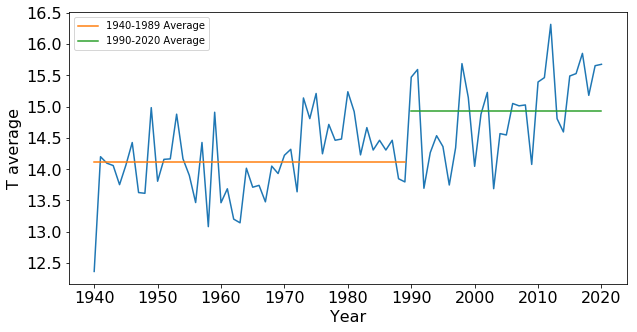

In [4]:
f = plt.figure(figsize=(10, 5))
plt.plot(range(1940, 2020 + 1), ta)
plt.plot(range(1940,1990),[average_40_90]*50,label='1940-1989 Average')
plt.plot(range(1990,2020+1),[average_90_21]*31,label='1990-2020 Average')
plt.xlabel("Year", fontsize = 16)
plt.ylabel("T average", fontsize = 16)
plt.xticks(np.arange(1940, 2021, 10), fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend()
plt.show()
f.savefig("./washington_Tavg.png", bbox_inches='tight', dpi=1200)

## 1940 - 2020 bloom doy

In [5]:
show_start = 1940
show_end = 2020
day_bloom_array = np.zeros(show_end - show_start + 1)
for y in range(show_start, show_end + 1):
    train_y = train[train['year'] == y]
    day_bloom_array[y - show_start] = int(np.array(train_y['bloom_doy'])[0])
print(day_bloom_array)
average_90_21_bloom=np.average(day_bloom_array[-31:])
average_40_90_bloom=np.average(day_bloom_array[:-31])
print(average_40_90_bloom,average_90_21_bloom)

[104. 102.  95.  94. 100.  79.  82. 102.  88.  88.  99.  96. 100.  86.
  96.  92.  97.  98. 108.  96. 105.  92.  97.  93. 102. 105.  95.  96.
  90.  99. 106.  98. 102. 101.  93.  93.  83.  85. 102.  92.  97.  93.
  97.  97.  94.  97.  92.  87.  91.  88.  74.  88.  98. 101.  95.  92.
  95.  85.  86.  95.  77.  96.  92.  92.  91.  99.  89.  91.  86.  91.
  90.  88.  80.  99. 100. 100.  85.  84.  95.  91.  80.]
95.28 90.48387096774194


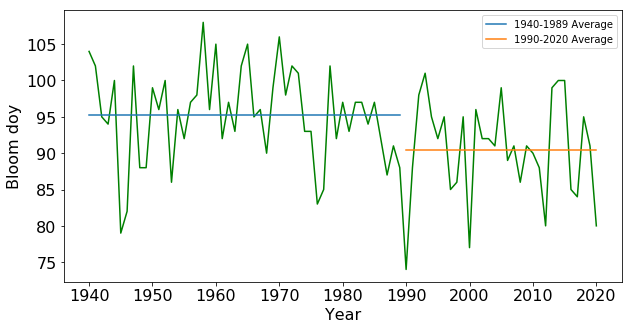

In [6]:
f = plt.figure(figsize=(10, 5))
plt.plot(range(1940, 2020 + 1), day_bloom_array, color = 'green')
plt.plot(range(1940,1990),[average_40_90_bloom]*50,label='1940-1989 Average')
plt.plot(range(1990,2020+1),[average_90_21_bloom]*31,label='1990-2020 Average')
plt.xlabel("Year", fontsize = 16)
plt.ylabel("Bloom doy", fontsize = 16)
plt.xticks(np.arange(1940, 2021, 10), fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend()
plt.show()
f.savefig("./washington_bloom_doy.png", bbox_inches='tight', dpi=1200)